In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.to_csv('farmer.csv',index=False)

In [4]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
group = df.groupby('label')

In [6]:
group[['N']].mean()

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [7]:
df['label'].nunique()

22

In [8]:
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
nitrogen = group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')

In [10]:
nitrogen 

,min_nitro,max_nitro,avg_nitro
label,,,
apple,0,40,20.80
banana,80,120,100.23
blackgram,20,60,40.02
chickpea,20,60,40.09
coconut,0,40,21.98
coffee,80,120,101.20
cotton,100,140,117.77
grapes,0,40,23.18
jute,60,100,78.40


In [11]:
nitrogen.reset_index(inplace=True)

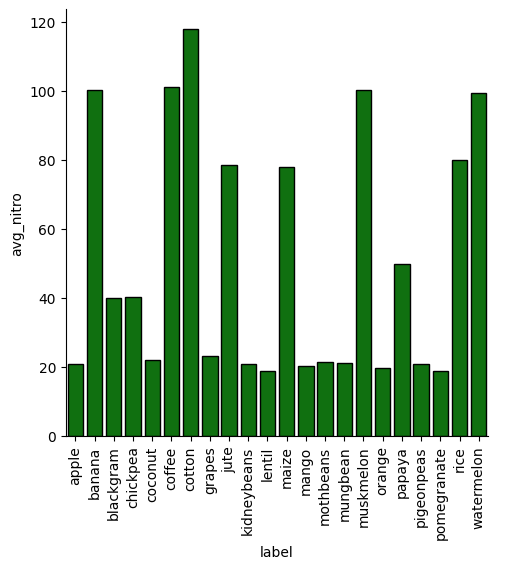

In [12]:
# sns.set(rc={'figure.figsize':(8,18)})
sns.catplot(x='label',y='avg_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

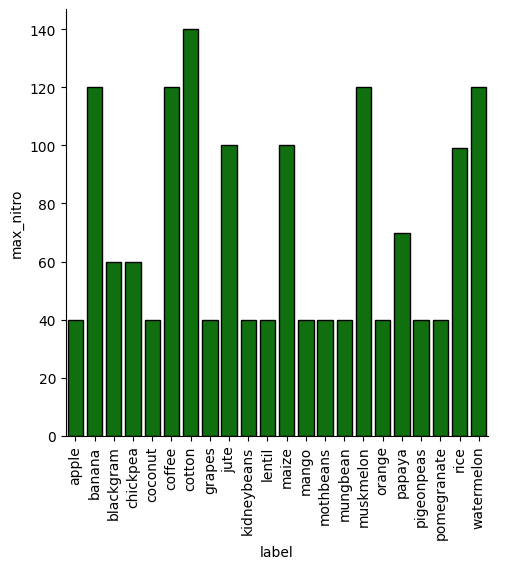

In [13]:
sns.catplot(x='label',y='max_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

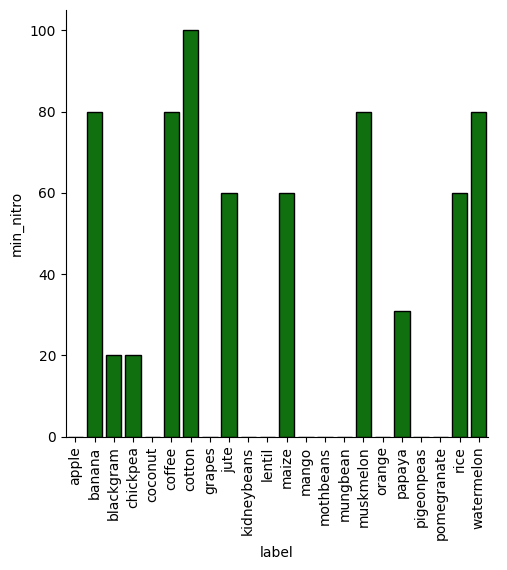

In [14]:
sns.catplot(x='label',y='min_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

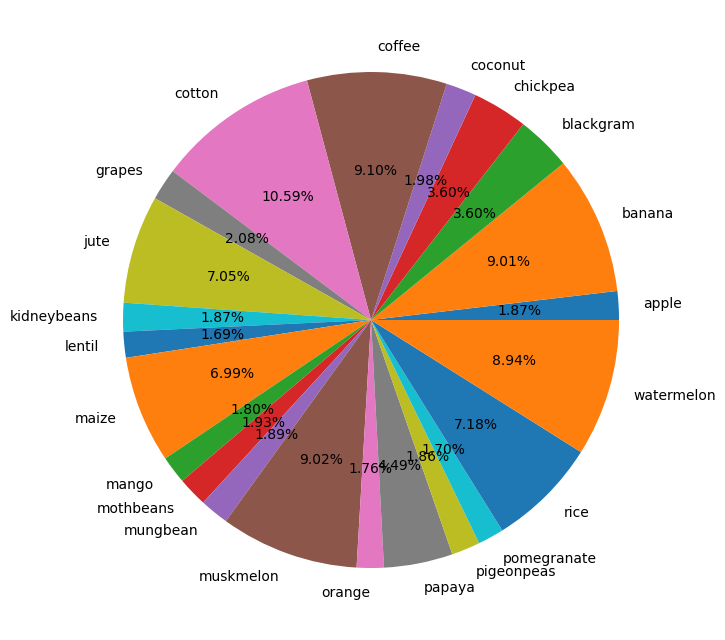

In [23]:
crops_label = list(nitrogen['label']) 
avg_nitrogen = list(nitrogen['avg_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

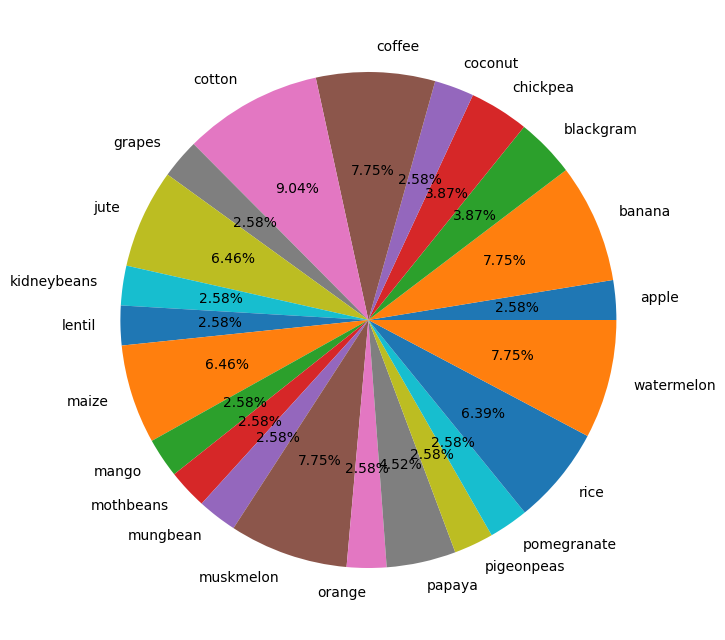

In [25]:
crops_label = list(nitrogen['label']) 
avg_nitrogen = list(nitrogen['max_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

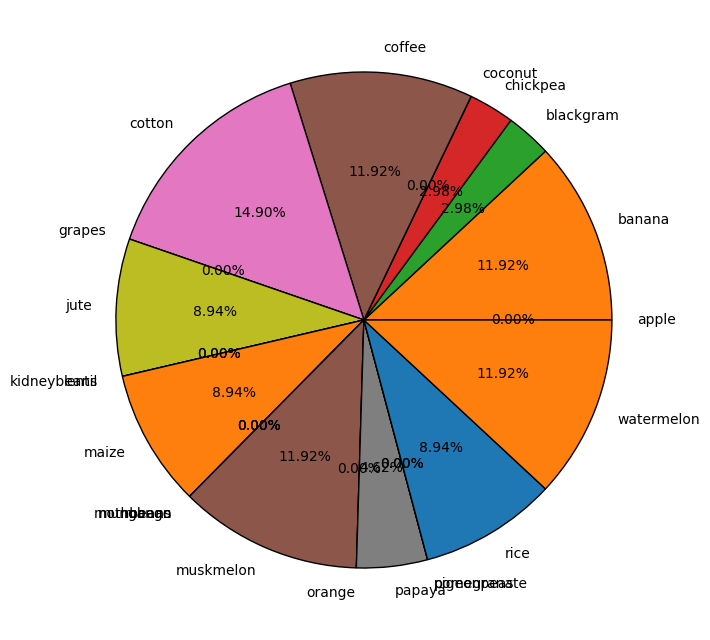

In [27]:
crops_label = list(nitrogen['label']) 
avg_nitrogen = list(nitrogen['min_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'k'})
plt.show()

In [31]:
## unsupervised  X 
x = df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [34]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [35]:
df.duplicated().sum()

0

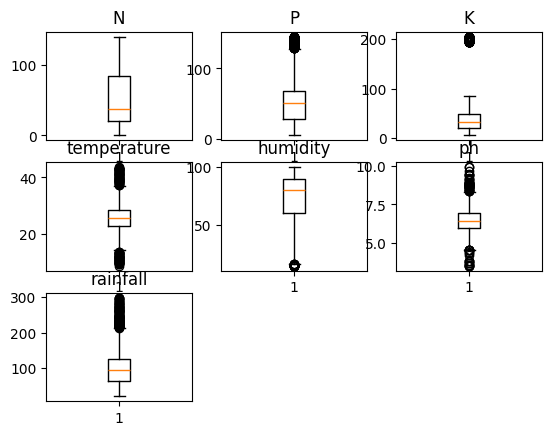

In [72]:
i = 1 
for col in x.columns: 
    plt.subplot(3,3,i)
    plt.title(col)
    plt.boxplot(df[col])
    i += 1 


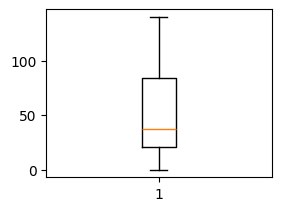

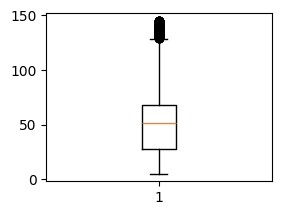

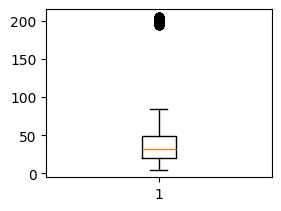

In [44]:
plt.subplot(2,2,1)
plt.boxplot(df['N'])
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df['P'])
plt.show()

plt.subplot(2,2,3)
plt.boxplot(df['K'])
plt.show()


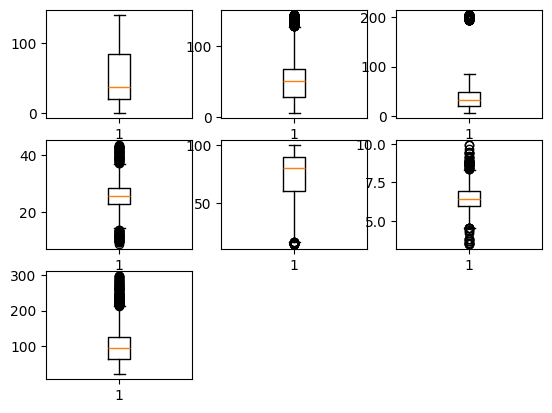

In [69]:

# sir ise check karna ek bar

In [57]:
df['N'].mean()  # var()   # std()

50.551818181818184

In [61]:
 # KMeans  accuracy  normalize   
from sklearn.preprocessing import MinMaxScaler , RobustScaler ,Normalizer , StandardScaler 
std = StandardScaler()

x_transformed =  std.fit_transform(x)

In [65]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [68]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [66]:
x_transformed.shape 

(2200, 7)

In [67]:
x.shape 

(2200, 7)

In [76]:
from sklearn.cluster import KMeans  
kmeans = KMeans()  
kmeans.fit(x_transformed)

KMeans()

In [79]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [82]:
kmeans.labels_.shape  , df.shape 

((2200,), (2200, 8))

In [83]:
df['cluster_no'] = kmeans.labels_ 

In [91]:
groupno_six = df[df['cluster_no'] == 5 ]

In [92]:
groupno_six['label'].unique()

array(['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'mango', 'orange', 'papaya'], dtype=object)

In [95]:
# saving the objects 
import os,joblib 
os.makedirs('models',exist_ok=True) 

joblib.dump(kmeans,'./models/kmeans_model.lb')
joblib.dump(std,'./models/standardscaler.lb') 
print('Your model has been saved!')

Your model has been saved!


In [96]:
from sklearn.metrics import silhouette_score  

In [97]:
silhouette_score(x_transformed,kmeans.labels_)  

0.29128866048782875

In [99]:
df[['label','cluster_no']].to_csv('./models/filtering_data.csv',index=False)